# Utilizing Expert Knowledge

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
citibike = pd.read_csv("data/citibike.csv")

In [10]:
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,3117,8/1/2015 01:19:15,8/1/2015 02:11:12,301,E 2 St & Avenue B,40.722174,-73.983688,301,E 2 St & Avenue B,40.722174,-73.983688,18070,Subscriber,1986.0,1
1,690,8/1/2015 01:27:30,8/1/2015 01:39:00,301,E 2 St & Avenue B,40.722174,-73.983688,349,Rivington St & Ridge St,40.718502,-73.983299,19699,Subscriber,1985.0,1
2,727,8/1/2015 01:38:49,8/1/2015 01:50:57,301,E 2 St & Avenue B,40.722174,-73.983688,2010,Grand St & Greene St,40.721655,-74.002347,20953,Subscriber,1982.0,1
3,698,8/1/2015 06:06:41,8/1/2015 06:18:20,301,E 2 St & Avenue B,40.722174,-73.983688,527,E 33 St & 2 Ave,40.744023,-73.976056,23566,Subscriber,1976.0,1
4,351,8/1/2015 06:24:29,8/1/2015 06:30:21,301,E 2 St & Avenue B,40.722174,-73.983688,250,Lafayette St & Jersey St,40.724561,-73.995653,17545,Subscriber,1959.0,1


In [11]:
citibike["start station name"].unique()

array(['E 2 St & Avenue B'], dtype=object)

In [12]:
citibike['one'] = 1
citibike['starttime'] = pd.to_datetime(citibike['starttime'])
citibike = citibike.set_index("starttime")
citibike = citibike.resample("3h").sum().fillna(0)
citibike.head()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,one
starttime,,,,,,,,,,,
2015-08-01 00:00:00,4534,903,122.166523,-221.951063,2660,122.162331,-221.969334,58722,5953.0,3,3
2015-08-01 03:00:00,0,0,0.000000,0.000000,0,0.000000,0.000000,0,0.0,0,0
2015-08-01 06:00:00,4868,2709,366.499570,-665.853190,3456,366.578445,-665.923247,179012,17841.0,11,9
2015-08-01 09:00:00,34595,12341,1669.609152,-3033.331199,15167,1670.028362,-3033.620739,742311,57422.0,35,41
2015-08-01 12:00:00,26850,11739,1588.164803,-2885.363824,14286,1588.322750,-2885.528995,723894,65367.0,42,39


In [13]:
citibike = citibike["one"]

In [14]:
citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

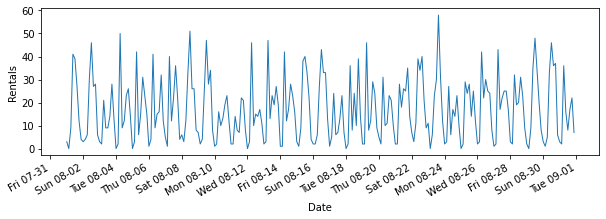

In [15]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%a %m-%d"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.plot(citibike, linewidth=1)
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Rentals")
plt.show()

In [16]:
# extract the target values (number of rentals)
y = citibike.values

In [17]:
# convert to POSIX time by dividing by 10**9
X = citibike.index.view(np.int64).reshape(-1, 1) // 10 ** 9

In [18]:
X.shape

(248, 1)

In [19]:
X[:5]

array([[1438387200],
       [1438398000],
       [1438408800],
       [1438419600],
       [1438430400]])

In [20]:
# use the first 184 data points for training, and the rest for testing
n_train = 184
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print(f"Test-set R^2: {regressor.score(X_test, y_test):.2f}")
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


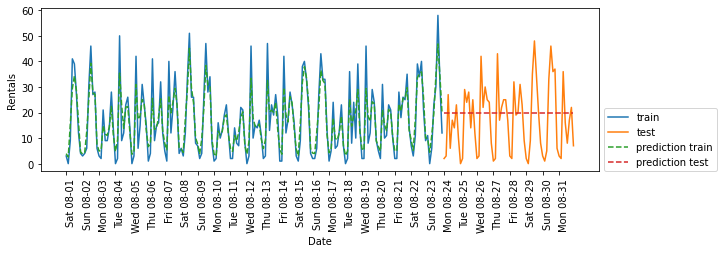

In [21]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

In [22]:
X_hour = citibike.index.hour.values.reshape(-1, 1)

In [23]:
print(X_hour[:12])

[[ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]
 [ 6]
 [ 9]]


Test-set R^2: 0.60


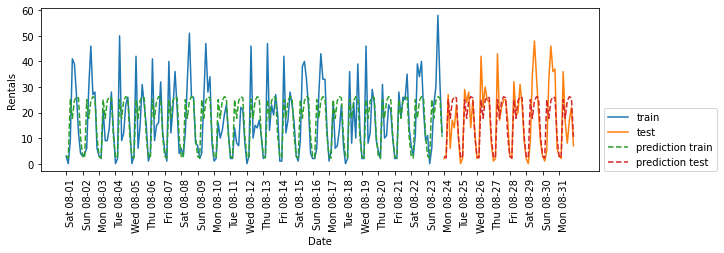

In [24]:
eval_on_features(X_hour, y, regressor)

In [25]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1), citibike.index.hour.values.reshape(-1, 1)])

In [26]:
X_hour_week[:10]

array([[ 5,  0],
       [ 5,  3],
       [ 5,  6],
       [ 5,  9],
       [ 5, 12],
       [ 5, 15],
       [ 5, 18],
       [ 5, 21],
       [ 6,  0],
       [ 6,  3]])

Test-set R^2: 0.84


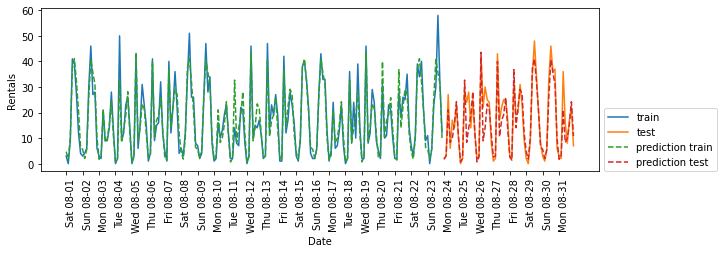

In [27]:
eval_on_features(X_hour_week, y, regressor)

Test-set R^2: 0.13


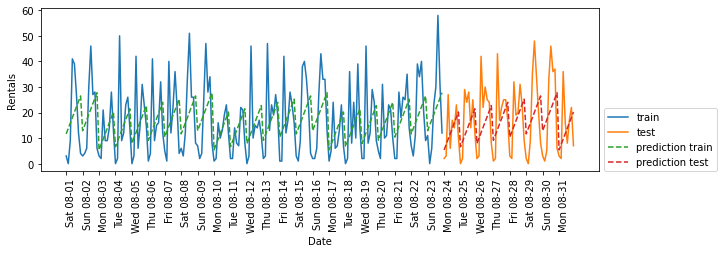

In [28]:
from sklearn.linear_model import LinearRegression

eval_on_features(X_hour_week, y, LinearRegression())

In [30]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

In [31]:
X_hour_week_onehot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

Test-set R^2: 0.62


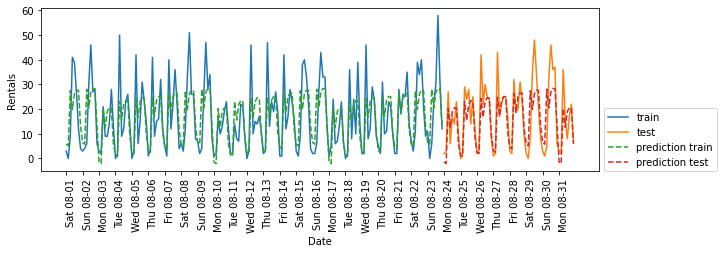

In [32]:
from sklearn.linear_model import Ridge

eval_on_features(X_hour_week_onehot, y, Ridge())

Test-set R^2: 0.85


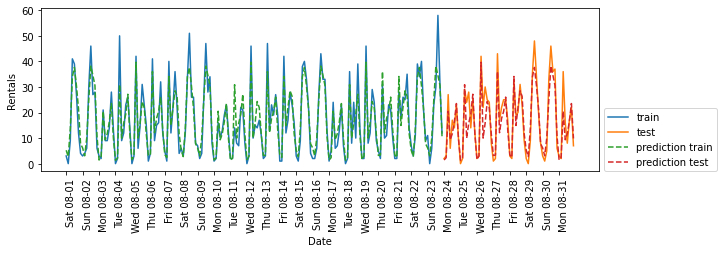

In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)

lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [35]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features =  day + hour

In [37]:
features_poly = poly_transformer.get_feature_names_out(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

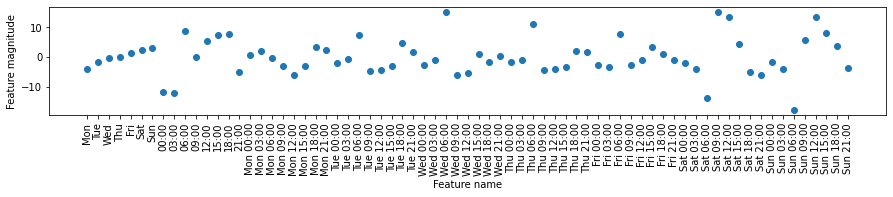

In [38]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")
plt.show()